In [3]:
#Carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
pip install jinja2


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
def load_monthly_data(month):
  filename = "{month}.csv"  # Adjust filename format as needed
  data = pd.read_csv(filename)
  return data

Read and Concatenate the monthly data.

In [6]:
# List of file names
files = [
    '2023_04.csv', '2023_05.csv', '2023_06.csv', '2023_07.csv',
    '2023_08.csv', '2023_09.csv', '2023_10.csv', '2023_11.csv',
    '2023_12.csv', '2024_01.csv', '2024_02.csv', '2024_03.csv',
    '2024_04.csv'
]

# Path to the directory containing the files
directory_path = 'C:/Users/Win10/Desktop/Google/Bikes'

# Initialize an empty list to store dataframes
dataframes = []

# Loop through the list of files and read each one
for file in files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all dataframes into one
CyclYearData = pd.concat(dataframes, ignore_index=True)

# Optionally, you can save the merged dataframe to a new CSV file
CyclYearData.to_csv('CyclYearData.csv', index=False)

Pie Graphic of membership type.

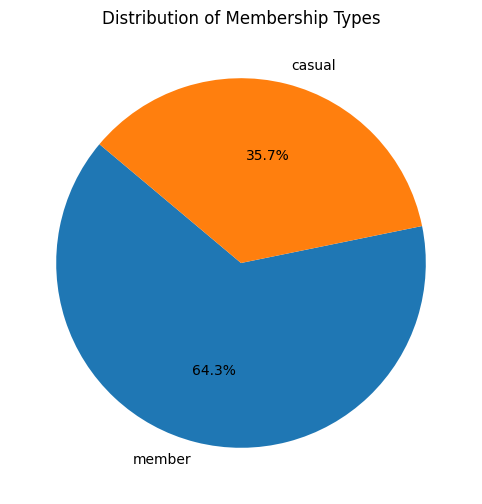

In [7]:
# Count the occurrences of each membership type
membership_counts = CyclYearData['member_casual'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Membership Types')
plt.show()

Add the month column and a season column based on the month

In [8]:
# Ensure 'started_at' is in datetime format
CyclYearData['started_at'] = pd.to_datetime(CyclYearData['started_at'])

# Extract the month from the 'started_at' column
CyclYearData['month'] = CyclYearData['started_at'].dt.month

# Define the mapping of months to seasons
def assign_season(month):
    if month in [1, 2, 3]:
        return 'Winter'
    elif month in [4, 5, 6]:
        return 'Spring'
    elif month in [7, 8, 9]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new 'season' column
CyclYearData['season'] = CyclYearData['month'].apply(assign_season)

# Display the first few rows to verify the new columns
print(CyclYearData.head())

            ride_id  rideable_type          started_at             ended_at  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02 08:37:28  2023-04-02 08:41:37   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19 11:29:02  2023-04-19 11:52:12   
2  5296BF07A2F77CB5  electric_bike 2023-04-19 08:41:22  2023-04-19 08:43:22   
3  40759916B76D5D52  electric_bike 2023-04-19 13:31:30  2023-04-19 13:35:09   
4  77A96F460101AC63  electric_bike 2023-04-19 12:05:36  2023-04-19 12:10:26   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              NaN              NaN            NaN   
3                NaN              NaN              NaN            NaN   
4                NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  end_lng member_casual  month  season  
0      41.80 

Now I want a bar graphic of total supscriptions by type and season

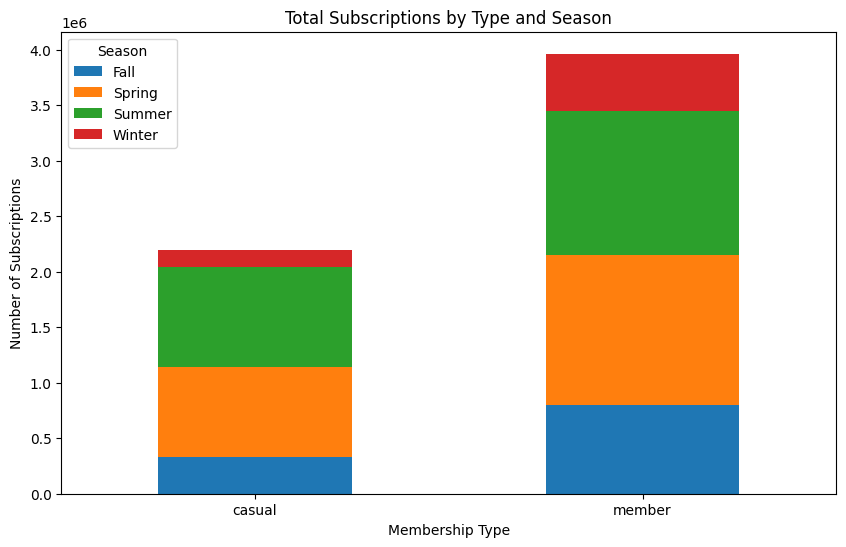

In [9]:
# Group by 'member_casual' and 'season' and count the occurrences
subscription_counts = CyclYearData.groupby(['member_casual', 'season']).size().unstack()

# Plot the bar chart
subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Subscriptions by Type and Season')
plt.xlabel('Membership Type')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=0)
plt.legend(title='Season')
plt.show()

A Table data with conditional formating of number of subscriptions by month and by membership type.

In [10]:
# Group by 'member_casual' and 'month' and count the occurrences
membership_by_month = CyclYearData.groupby(['member_casual', 'month']).size().unstack(fill_value=0)

# Function for conditional formatting
def color_scale(val):
    if val >= 200000:
        return 'background-color: darkgreen; color: white'
    elif val >= 100000:
        return 'background-color: green; color: white'
    else:
        return 'background-color: pink; color: black'

# Apply conditional formatting to the DataFrame
styled_table = membership_by_month.style.applymap(color_scale)

# Display the styled table (in a Jupyter environment)
styled_table

C:\Users\Win10\AppData\Local\Temp\ipykernel_6260\2226912917.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = membership_by_month.style.applymap(color_scale)


month,1,2,3,4,5,6,7,8,9,10,11,12
member_casual,,,,,,,,,,,,
casual,24460,47163,82550,279095,234181,301230,331358,311130,261635,177071,98392,51672
member,120413,176001,219137,562520,370646,418388,436292,460563,404736,360042,264126,172401


The mean ride time vs month

First we create de 'ride_lenght' column

In [11]:
# Convert 'started_at' and 'ended_at' to datetime if they are not already
CyclYearData['started_at'] = pd.to_datetime(CyclYearData['started_at'])
CyclYearData['ended_at'] = pd.to_datetime(CyclYearData['ended_at'])

# Calculate the ride length in minutes
CyclYearData['ride_length'] = (CyclYearData['ended_at'] - CyclYearData['started_at']).dt.total_seconds() / 60

# Display the first few rows to verify
print(CyclYearData.head())

            ride_id  rideable_type          started_at            ended_at  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02 08:37:28 2023-04-02 08:41:37   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19 11:29:02 2023-04-19 11:52:12   
2  5296BF07A2F77CB5  electric_bike 2023-04-19 08:41:22 2023-04-19 08:43:22   
3  40759916B76D5D52  electric_bike 2023-04-19 13:31:30 2023-04-19 13:35:09   
4  77A96F460101AC63  electric_bike 2023-04-19 12:05:36 2023-04-19 12:10:26   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              NaN              NaN            NaN   
3                NaN              NaN              NaN            NaN   
4                NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  end_lng member_casual  month  season  \
0      41.80     -

Then we can use that new column for the graphics

First Mean time ride by month

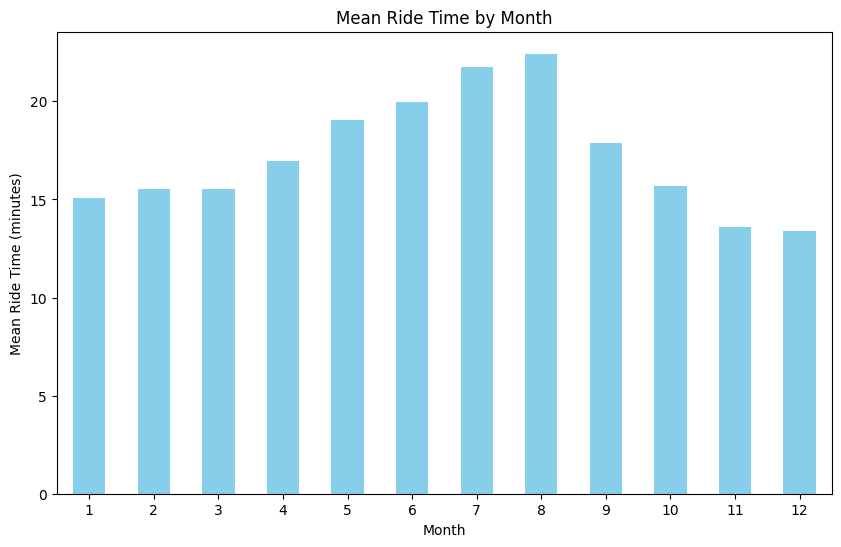

In [12]:
# Calculate mean ride time by month
mean_ride_time_by_month = CyclYearData.groupby('month')['ride_length'].mean()

# Plot mean ride time by month
plt.figure(figsize=(10, 6))
mean_ride_time_by_month.plot(kind='bar', color='skyblue')
plt.title('Mean Ride Time by Month')
plt.xlabel('Month')
plt.ylabel('Mean Ride Time (minutes)')
plt.xticks(rotation=0)
plt.show()

Now mean ride time by season

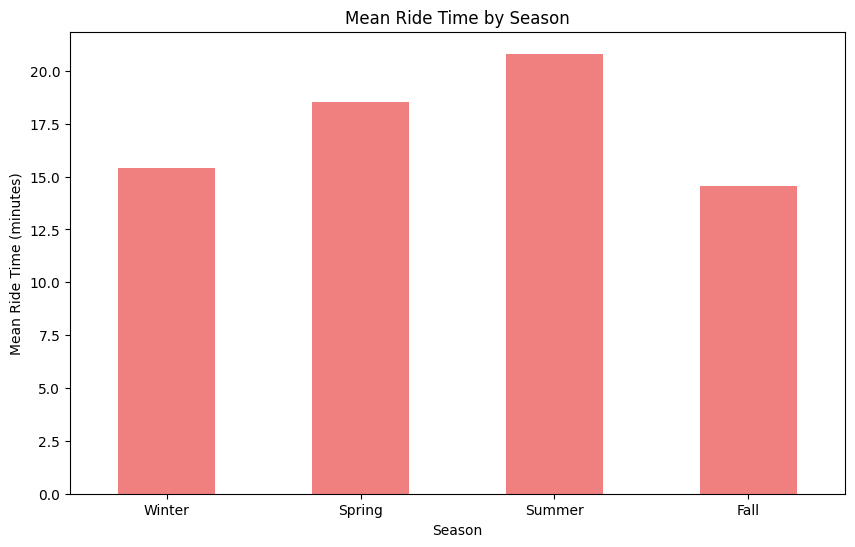

In [13]:
# Calculate mean ride time by season
mean_ride_time_by_season = CyclYearData.groupby('season')['ride_length'].mean()

# Plot mean ride time by season
plt.figure(figsize=(10, 6))
mean_ride_time_by_season.reindex(['Winter', 'Spring', 'Summer', 'Fall']).plot(kind='bar', color='lightcoral')
plt.title('Mean Ride Time by Season')
plt.xlabel('Season')
plt.ylabel('Mean Ride Time (minutes)')
plt.xticks(rotation=0)
plt.show()

Now a mean ride time by member time and month

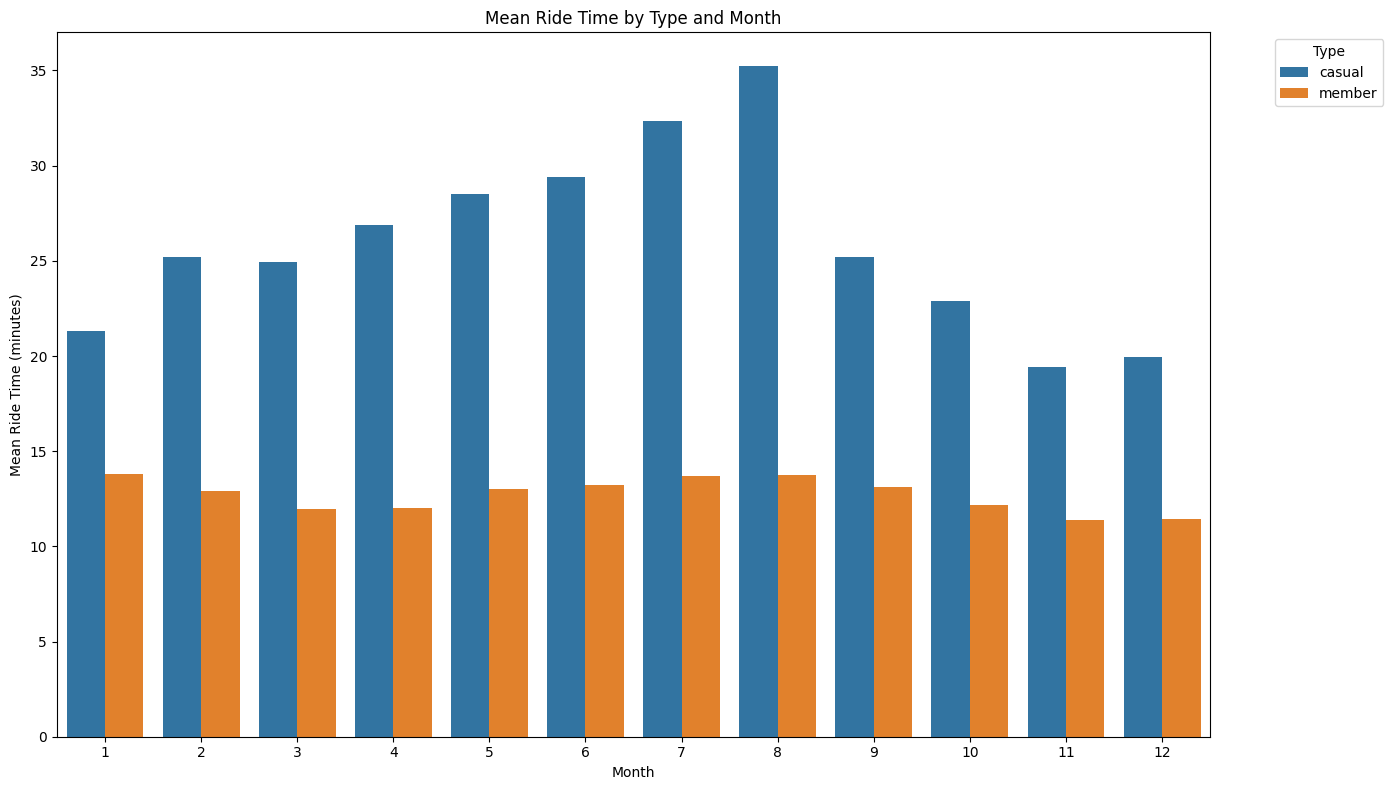

In [14]:
# Calculate mean ride time by type and month
mean_ride_time_by_type_month = CyclYearData.groupby(['member_casual', 'month'])['ride_length'].mean().reset_index()

# Plot mean ride time by type and month using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_ride_time_by_type_month, x='month', y='ride_length', hue='member_casual')
plt.title('Mean Ride Time by Type and Month')
plt.xlabel('Month')
plt.ylabel('Mean Ride Time (minutes)')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The same table data with conditional formating of number of subscriptions by month and by membership type with the months name changed.

In [15]:
# Group by 'member_casual' and 'month' and count the occurrences
membership_by_month = CyclYearData.groupby(['member_casual', 'month']).size().unstack(fill_value=0)

# Create a dictionary to map month numbers to desired month names
month_mapping = {
    1: 'January 2024', 2: 'February 2024', 3: 'March 2024', 
    4: 'April 2023', 5: 'May 2023', 6: 'June 2023', 
    7: 'July 2023', 8: 'August 2023', 9: 'September 2023', 
    10: 'October 2023', 11: 'November 2023', 12: 'December 2023'
}

# Rename the columns using the month_mapping dictionary
membership_by_month.columns = [month_mapping[col] for col in membership_by_month.columns]

# Function for conditional formatting
def color_scale(val):
    if val >= 200000:
        return 'background-color: darkgreen; color: white'
    elif val >= 100000:
        return 'background-color: green; color: white'
    else:
        return 'background-color: pink; color: black'

# Apply conditional formatting to the DataFrame
styled_table = membership_by_month.style.applymap(color_scale)

# Display the styled table (in a Jupyter environment)
styled_table

C:\Users\Win10\AppData\Local\Temp\ipykernel_6260\4228415835.py:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = membership_by_month.style.applymap(color_scale)


,January 2024,February 2024,March 2024,April 2023,May 2023,June 2023,July 2023,August 2023,September 2023,October 2023,November 2023,December 2023
member_casual,,,,,,,,,,,,
casual,24460,47163,82550,279095,234181,301230,331358,311130,261635,177071,98392,51672
member,120413,176001,219137,562520,370646,418388,436292,460563,404736,360042,264126,172401


In [16]:
# Extract the day from 'started_at' and create a new 'day' column
CyclYearData['day'] = CyclYearData['started_at'].dt.day

# Display the first few rows to confirm the new column
CyclYearData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,season,ride_length,day
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member,4,Spring,4.150000,2
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,4,Spring,23.166667,19
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,4,Spring,2.000000,19
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member,4,Spring,3.650000,19
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,4,Spring,4.833333,19


In [17]:
# Group by 'member_casual' and 'day' and count the occurrences
subscriptions_by_day = CyclYearData.groupby(['member_casual', 'day']).size().unstack(fill_value=0)

# Display the table
subscriptions_by_day

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
member_casual,,,,,,,,,,,,,,,,,,,,,
casual,65480,70485,86122,89073,61739,67227,72303,72229,85879,82860,...,70290,76625,70528,62558,59168,75976,66795,73962,74910,31000
member,116008,123186,131334,135322,126171,132337,135528,131597,141017,142525,...,127621,124679,123489,123540,122540,135681,122871,124725,129285,66903


Table of Overall subscriptions by day and type

In [18]:
# Extract the day name from 'started_at' and create a new 'day_name' column
CyclYearData['day_name'] = CyclYearData['started_at'].dt.day_name()

# Define the correct order for days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Group by 'member_casual' and 'day_name' and count the occurrences
subscriptions_by_day = CyclYearData.groupby(['member_casual', 'day_name']).size().unstack(fill_value=0)

# Reorder the columns to match the correct day order
subscriptions_by_day = subscriptions_by_day[day_order]

# Function for conditional formatting
def color_scale(val):
    if val >= 300000:
        return 'background-color: green; color: white'
    else:
        return 'background-color: orange; color: black'

# Apply conditional formatting to the DataFrame
styled_table = subscriptions_by_day.style.applymap(color_scale)

# Display the styled table (in a Jupyter environment)
styled_table

C:\Users\Win10\AppData\Local\Temp\ipykernel_6260\4156090259.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = subscriptions_by_day.style.applymap(color_scale)


day_name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
member_casual,,,,,,,
casual,361646,256234,263300,258591,283961,326823,449382
member,438841,550456,626787,627027,639067,564695,518392


In [19]:
# Group by 'season' and calculate the mean ride length
mean_ride_length_by_season = CyclYearData.groupby('season')['ride_length'].mean()

# Display the result
mean_ride_length_by_season

season
Fall      14.552432
Spring    18.541098
Summer    20.811444
Winter    15.417116
Name: ride_length, dtype: float64

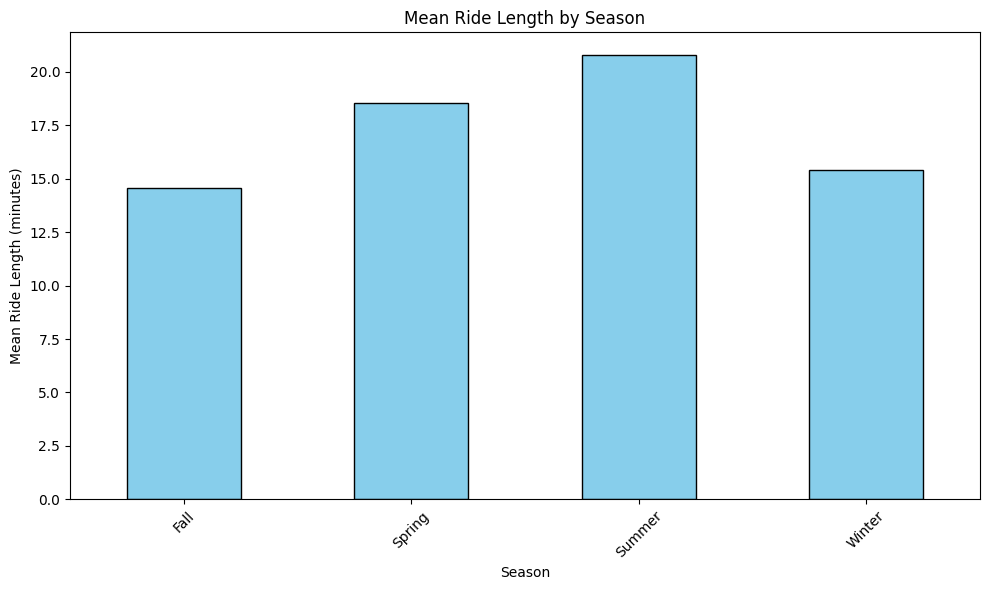

In [20]:
import matplotlib.pyplot as plt

# Plot the mean ride length by season as a vertical bar chart
plt.figure(figsize=(10, 6))
mean_ride_length_by_season.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Mean Ride Length (minutes)')
plt.title('Mean Ride Length by Season')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Group by 'month' and calculate the mean ride length
mean_ride_length_by_month = CyclYearData.groupby('month')['ride_length'].mean()

In [22]:
# Create a dictionary for month names
month_mapping = {
    '2023-04': 'April 2023', '2023-05': 'May 2023', '2023-06': 'June 2023',
    '2023-07': 'July 2023', '2023-08': 'August 2023', '2023-09': 'September 2023',
    '2023-10': 'October 2023', '2023-11': 'November 2023', '2023-12': 'December 2023',
    '2024-01': 'January 2024', '2024-02': 'February 2024', '2024-03': 'March 2024',
    '2024-04': 'April 2024'
}

In [23]:
# Convert 'month' column to the period format
CyclYearData['month'] = CyclYearData['started_at'].dt.to_period('M').astype(str)

# Group by 'month' and calculate the mean ride length
mean_ride_length_by_month = CyclYearData.groupby('month')['ride_length'].mean()

# Rename the months using the dictionary
mean_ride_length_by_month.index = mean_ride_length_by_month.index.map(month_mapping)

# Display the result
mean_ride_length_by_month

month
April 2023        17.210677
May 2023          19.033562
June 2023         19.983941
July 2023         21.737970
August 2023       22.428446
September 2023    17.871526
October 2023      15.684275
November 2023     13.585396
December 2023     13.403878
January 2024      15.057384
February 2024     15.508204
March 2024        15.522483
April 2024        16.689145
Name: ride_length, dtype: float64

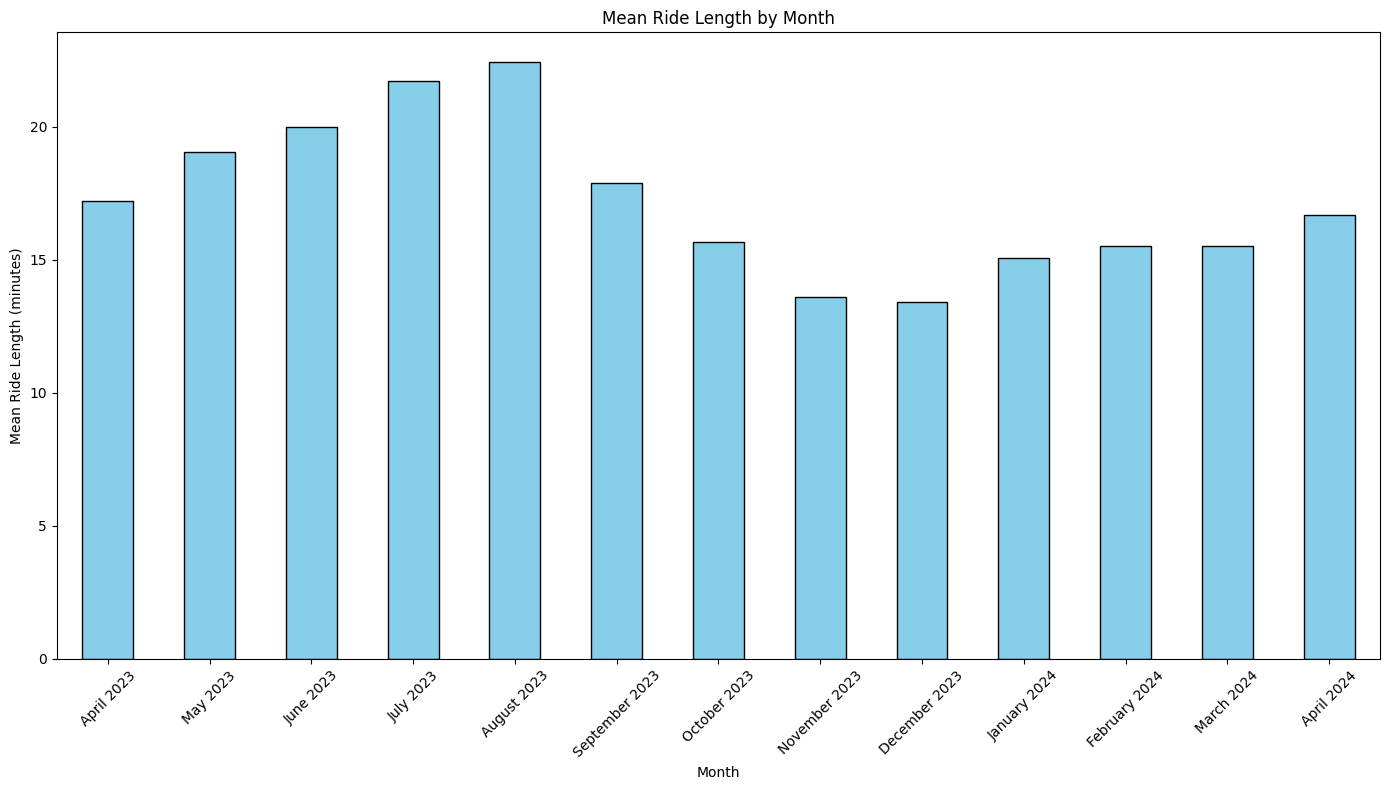

In [24]:
# Plot the mean ride length by month as a vertical bar chart
plt.figure(figsize=(14, 8))
mean_ride_length_by_month.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Mean Ride Length (minutes)')
plt.title('Mean Ride Length by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
# Group by 'month' and 'member_casual' and calculate the mean ride length
mean_ride_length_by_month_and_type = CyclYearData.groupby(['month', 'member_casual'])['ride_length'].mean().unstack()

# Rename the months using the dictionary for better readability
mean_ride_length_by_month_and_type.index = mean_ride_length_by_month_and_type.index.map(month_mapping)

# Display the result
mean_ride_length_by_month_and_type

member_casual,casual,member
month,,
April 2023,27.672756,11.693743
May 2023,28.519831,13.039962
June 2023,29.406184,13.200137
July 2023,32.333083,13.691122
August 2023,35.242755,13.771832
September 2023,25.183901,13.144559
October 2023,22.869921,12.150328
November 2023,19.440792,11.404149
December 2023,19.936265,11.445992


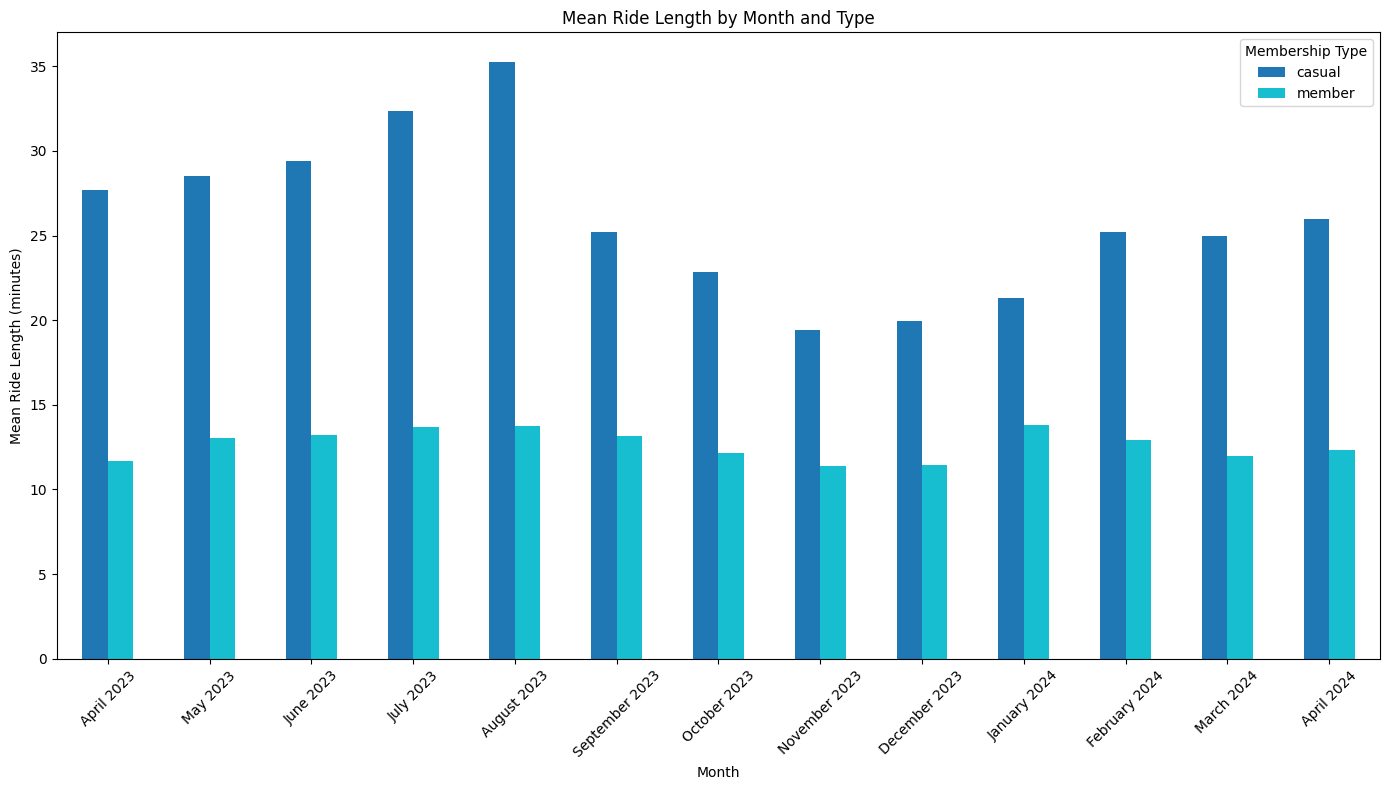

In [26]:
# Plot the mean ride length by month and type as a vertical bar chart
mean_ride_length_by_month_and_type.plot(kind='bar', figsize=(14, 8), colormap='tab10')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Mean Ride Length (minutes)')
plt.title('Mean Ride Length by Month and Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Membership Type')  # Add a legend for membership types
plt.tight_layout()

# Show the plot
plt.show()

Calculate the Top 10 Start and End Stations

In [27]:
# Count occurrences of each start station and get the top 10
top_10_start_stations = CyclYearData['start_station_name'].value_counts().head(10)

# Count occurrences of each end station and get the top 10
top_10_end_stations = CyclYearData['end_station_name'].value_counts().head(10)

Create the Vertical Bar Charts

Top 10 Start Stations

C:\Users\Win10\AppData\Local\Temp\ipykernel_6260\453020827.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='start_station_name', y='count', data=top_10_start_stations_df, palette='coolwarm')


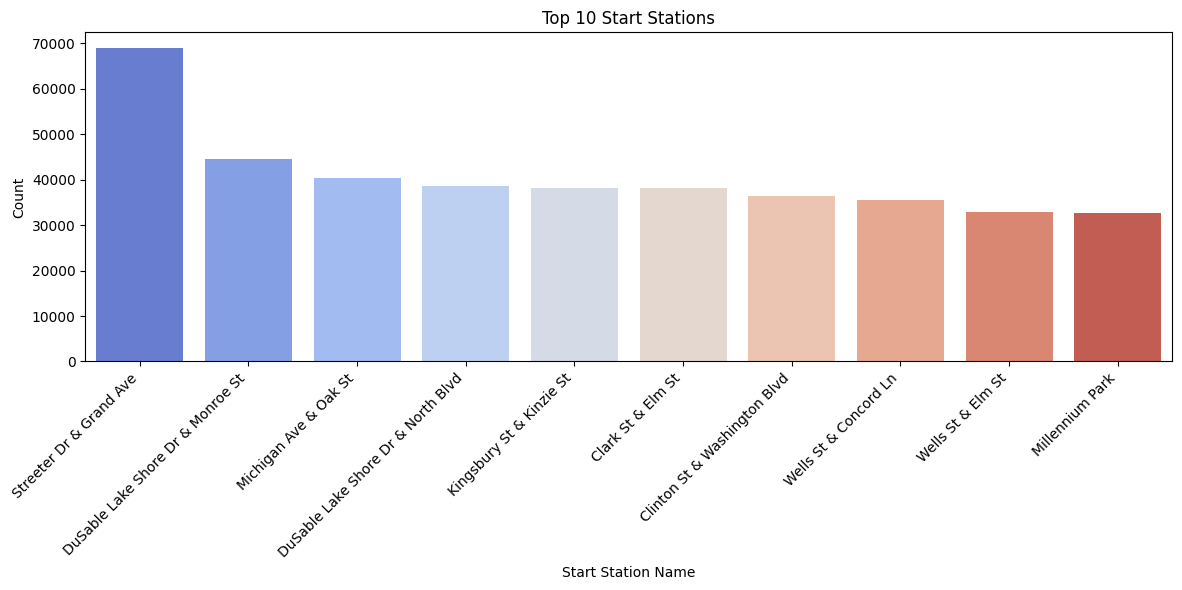

In [28]:
# Convert the Series to a DataFrame for seaborn
top_10_start_stations_df = top_10_start_stations.reset_index()
top_10_start_stations_df.columns = ['start_station_name', 'count']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='start_station_name', y='count', data=top_10_start_stations_df, palette='coolwarm')

# Add labels and title
plt.xlabel('Start Station Name')
plt.ylabel('Count')
plt.title('Top 10 Start Stations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

Top 10 End Stations

C:\Users\Win10\AppData\Local\Temp\ipykernel_6260\3878630749.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='end_station_name', y='count', data=top_10_end_stations_df, palette='coolwarm')


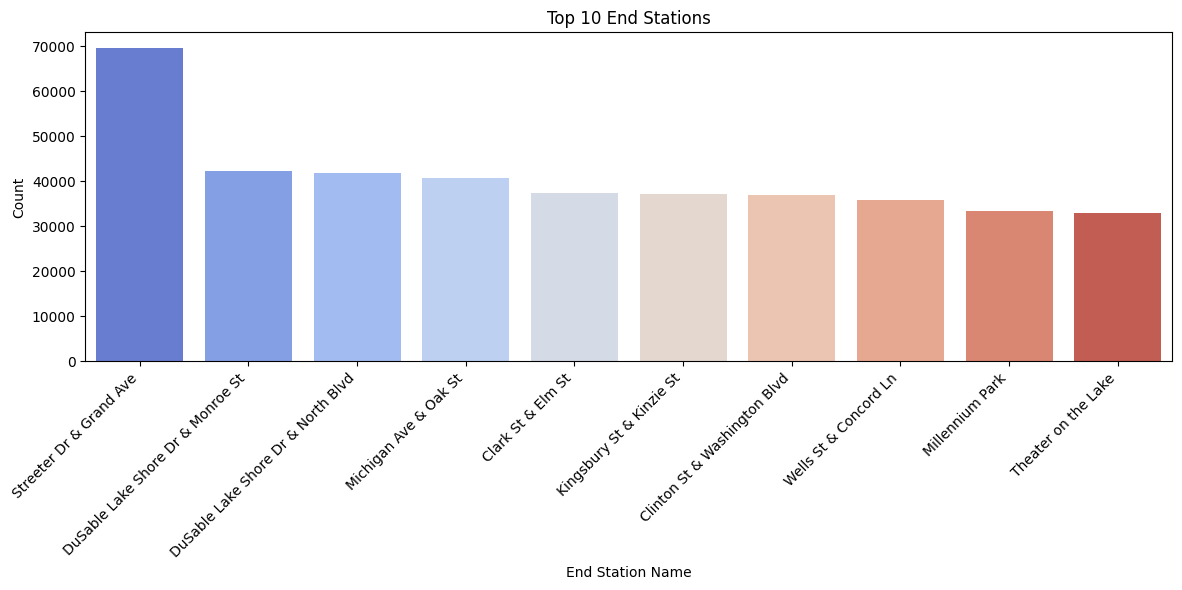

In [29]:
# Convert the Series to a DataFrame for seaborn
top_10_end_stations_df = top_10_end_stations.reset_index()
top_10_end_stations_df.columns = ['end_station_name', 'count']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='end_station_name', y='count', data=top_10_end_stations_df, palette='coolwarm')

# Add labels and title
plt.xlabel('End Station Name')
plt.ylabel('Count')
plt.title('Top 10 End Stations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

Guardar la data consolidada como CSV

In [30]:
# Guarda el DataFrame como un archivo CSV
CyclYearData.to_csv('CyclYearData.csv', index=False)

print("DataFrame saved as 'CyclYearData.csv'")

DataFrame saved as 'CyclYearData.csv'
